## MXNet Activations Tutorial

Deep neural networks encode a nonlinear, highly parametrized function from input to outputs. The nonlinearities that allow neural networks to be maximally expressive are referred to as activation functions. Over the course of the development of neural networks, several nonlinear activation functions have been introduced to make gradient-based deep learning tractable. This tutorial describes the activation functions implelemented in mxnet.

### Visualizing Activation
In order to compare the various activation functions and to understand the nuances of their differences we have a snipped code to to plot the activation functions and the gradients.

In [1]:
import numpy as np
import mxnet
from mxnet import nd, gluon, autograd
from matplotlib import pyplot as plt
%matplotlib inline

data = np.linspace(-10, 10, 501)

def visualize_activation(data, activation_fn, activation):
    x = nd.array(data)
    x.attach_grad()
    with autograd.record():
        y = activation_fn(x)
    y.backward()
    
    plt.figure()
    plt.plot(x.asnumpy(), y.asnumpy())
    plt.plot(x.asnumpy(), x.grad.asnumpy())
    plt.legend(["{} activation".format(activation), "{} gradient".format(activation)])

### Sigmoid
The sigmoid activation function, also known as the logistic function, is perhaps the most widely known activation owing to its appearance in logistic regression and kernel methods for classification. The sigmoid activation is a non-linear function that transforms any real valued input to a value between 0 and 1 giving it a natural probabilistic interpration. The sigmoid takes the form of the function below

$$ \sigma(x) = \dfrac{1}{1 + e^x} $$ or alternatively

$$ \sigma(x) = \dfrac{e^x}{e^x + 1} $$

Note: the term sigmoid is overloaded and can be used to refer to the class of 's' shaped functions or particularly to the logistic function that we've just described. In MxNet the sigmoid activation specifically refers to logistic function sigmoid.


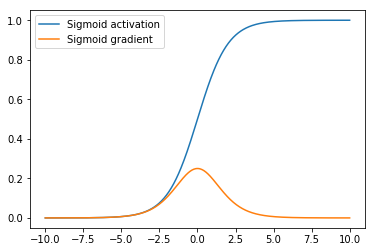

In [2]:
visualize_activation(data, gluon.nn.Activation('sigmoid'), "Sigmoid")

The sigmoid activation has since fallen out of use as the preferred activation function in designing neural networks due to some of it's properties, like not being zero-centered and inducing vanishing gradients, that leads to poor performance during neural network training. However, sigmoid still finds use in RNNs.

### tanh
The tanh activation function is also an s shaped curve defined by the mathematical equation:

$$ tanh(x) = \dfrac{e^x - e^{-x}}{e^x + e^{-x}}$$ 

tanh addresses the issues of not being zero centered associated with the sigmoid activation function but still retains the vanishing gradient problems due to the gradient being asymptotically zero for values outside a narrow range of inputs. 

In fact, the tanh can be rewritten as,

$$tanh(x) = \dfrac{e^{2x} - 1}{e^{2x} + 1}$$

which shows it's direct relation to sigmoid by the following equation:



$$ tanh(x) = 2\sigma(2x) - 1$$

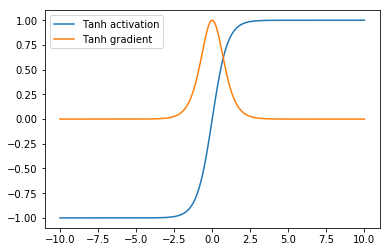

In [3]:
visualize_activation(data, gluon.nn.Activation('tanh'), "Tanh")

### SoftSign

The softsign activation is an alternative to tanh that is also centered at zero but converges asymptotically to -1 and 1 polynomially instead of exponentially. As such, there are a greater range of input values for which the softsign assigns an output of between -1 and 1.

$$ softsign(x) = \dfrac{x}{abs(x) + 1} $$

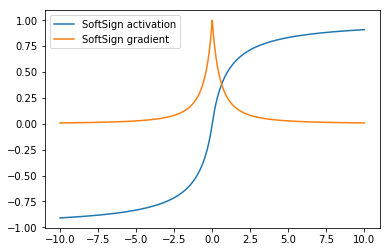

In [4]:
visualize_activation(data, gluon.nn.Activation('softsign'), "SoftSign")

The softsign function is not a commonly used activation with most neural networks and still suffers the vanishing gradient problem 

### ReLU
ReLU, or Rectified linear unit is the most common activation function in convolutional neural networks and introduces a simple nonlinearity. When the value of the input into ReLU is positive, then it retains the same value. When the value is negative then it becomes zero. In equation form, the ReLU function is given as:

$$ ReLU(x) = \mathtt{max}(0, x) $$

ReLU was introduced to neural networks in the [paper by Hahnloser et al](https://papers.nips.cc/paper/1793-permitted-and-forbidden-sets-in-symmetric-threshold-linear-networks.pdf) and gained widespread popularity after it was shown in the [paper](https://papers.nips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks.pdf) by Alex Krizhevsky et al to perform much better than sigmoid and tanh. This paper introduced the AlexNet CNN that won the ILSVRC challenge in 2012.

ReLU is the most widely used activation due to it's simplicity and performance across multiple datasets and although there have been efforts to introduce activation functions, many of them described in this tutorial, that improve on ReLU, they have not gained as much widespread adoption


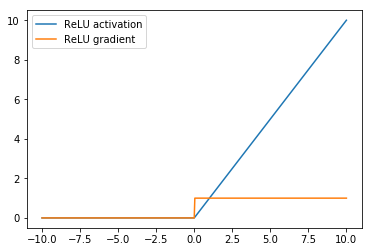

In [5]:
visualize_activation(data, gluon.nn.Activation('relu'), "ReLU")

As shown above, the ReLU activation addresses the vanishing gradient problem associated with the sigmoid family of activations, by having a larger (infinite) range of values where the gradient is non-zero

### SoftReLU

SoftReLU also known as SmoothReLU or SoftPlus is a nonlinear activation function that takes the form

$$ softReLU(x) = log(1 + e^x)$$

The softReLU can be seen as a smooth version of the ReLU by observing that it's derivative is the sigmoid, as seen below which is a smooth version of the gradient of the ReLU

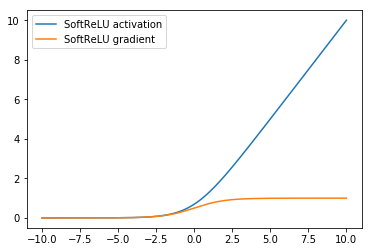

In [6]:
visualize_activation(data, gluon.nn.Activation('softrelu'), "SoftReLU")

### Leaky ReLU

Leaky ReLUs are a variant of ReLU that allow a small gradient when the value is negative. The equation for the LeakyReLU is:

$$ LeakyReLU(\alpha, x) = \begin{cases}
    x,& \text{if } x\geq 0\\
    \alpha x,              & \text{otherwise}
\end{cases}$$ 

where $\alpha > 0$ is small positive number. Here is a visualization for the LeakyReLU with $\alpha = 0.01$

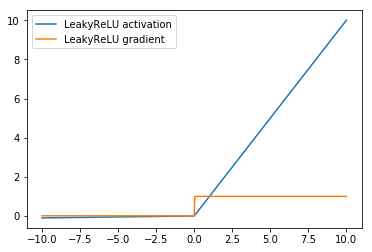

In [7]:
visualize_activation(data, gluon.nn.LeakyReLU(0.01), "LeakyReLU")

### PReLU
The PReLU activation function, or Parametric Leaky ReLU introduced by [He et al](https://arxiv.org/pdf/1502.01852.pdf), is a version of ReLU that learns the parameter $\alpha$ during training. An initialization parameter is passed into the LeakyReLU activation layer and this is treated as a learnable parameter that is updated via gradient descent during training. This is in contrast to LeakyReLU where $\alpha$ is a hyperparameter.

The activation function and activation gradient of PReLU have the same shape as LeakyRELU

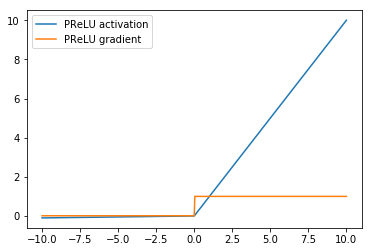

In [8]:
prelu = gluon.nn.LeakyReLU(0.01)
prelu.initialize()
visualize_activation(data, prelu, "PReLU")

### ELU

The ELU or exponential linear unit introduced by [Clevert et al](https://arxiv.org/abs/1511.07289) also addresses the vanishing gradient problem like ReLU and it's variants but unlike the ReLU family, ELU allows negative values which may allows them to push mean unit activations closer to zero like batch normalization. 

The ELU function has the form

$$ ELU(\alpha, x) = \begin{cases}
    x,& \text{if } x\geq 0\\
    \alpha (e^x - 1),              & \text{otherwise}
\end{cases}$$

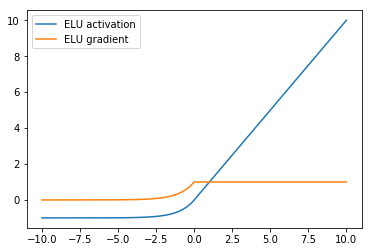

In [9]:
visualize_activation(data, gluon.nn.ELU(), "ELU")

### SELU
SELU stands for Scaled Exponential Linear Unit and was introduced by [Klambuer et al](https://arxiv.org/abs/1706.02515) and is a modification of the ELU that improves the normalization of it's outputs towards a zero mean and unit variance.

The SELU function has the form

$$ SELU(\alpha, x) = \lambda \cdot\begin{cases}
    x,& \text{if } x\geq 0\\
    \alpha (e^x - 1),              & \text{otherwise}
\end{cases}$$

In SELU, unlike ELU, the parameters $\alpha$ and $\lambda$ are fixed parameters calculated from the data. For standard scaled inputs, these values are $$\alpha=1.6732, \lambda=1.0507$$ as calculated in the paper.

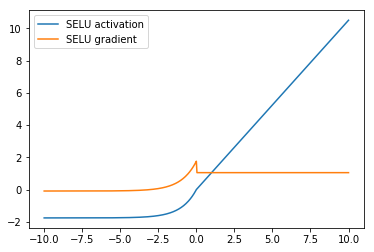

In [10]:
visualize_activation(data, gluon.nn.SELU(), "SELU")

### Swish
Swish is an activation function that attempts to address the shortcomings of ReLU by combining ideas from ReLU and sigmoid. Swish was discovered by searching the space of activation functions using a combination of exhaustive and reinforcement learning-based search and was introduced in the paper by [Ramchandran et al](https://arxiv.org/pdf/1710.05941.pdf)

The swish function is given as 

$$ swish(x) = x\cdot\sigma(\beta x)$$

where $\sigma$ is the sigmoid activation function $\sigma(x) = \frac{1}{1 + e^{-x}}$ described above and $\beta$ is a hyperparameter set to 1 by default in mxnet

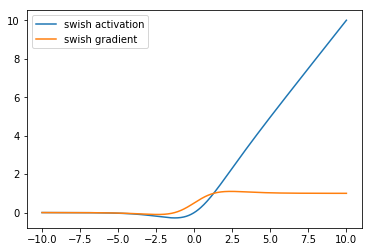

In [11]:
visualize_activation(data, gluon.nn.Swish(), "swish")